<a href="https://colab.research.google.com/github/mk7890/Python_Data_Analysis/blob/main/Life_Expectancy_DataCleaning%26Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing relevant packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import pyogrio

# Load csv data file

In [2]:
lifeExpectancy = pd.read_csv('/content/Life Expectancy Data.csv')
lifeExpectancy.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Getting some information about the dataset

In [3]:
lifeExpectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
lifeExpectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Overview of null values

In [5]:
lifeExpectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [6]:
percentage = (lifeExpectancy.isnull().sum()/len(lifeExpectancy))*100
percentage

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


In [7]:
lifeExpectancy=pd.DataFrame(lifeExpectancy)
lifeExpectancy.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Listing dataset Columns

In [ ]:
lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

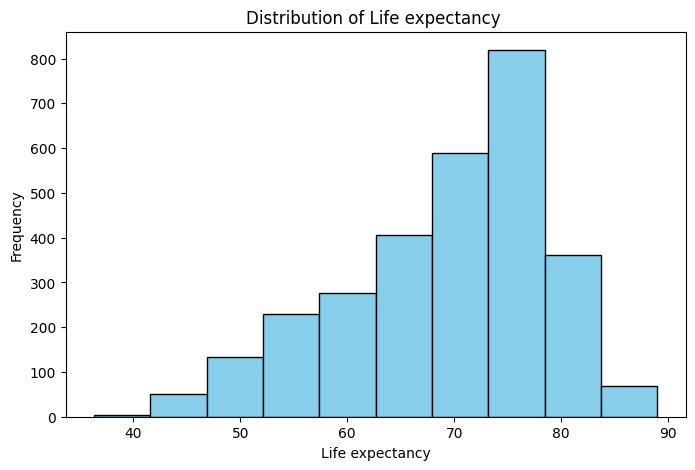

In [37]:
#life expectancy plot

plt.figure(figsize=(8, 5))
plt.hist(lifeExpectancy['Life expectancy '], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Life expectancy ')
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt

# Life expectancy normal skewed: use mean

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

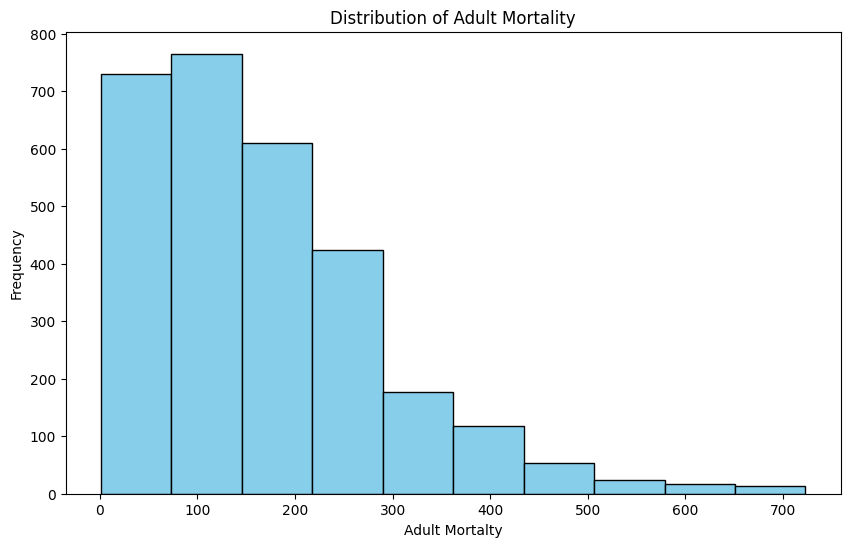

In [10]:
#Adult mortality plot

plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Adult Mortality'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Adult Mortality')
plt.xlabel('Adult Mortalty')
plt.ylabel('Frequency')
plt

# Adult mortality skewed to the left: use median

Text(0, 0.5, 'Frequency')

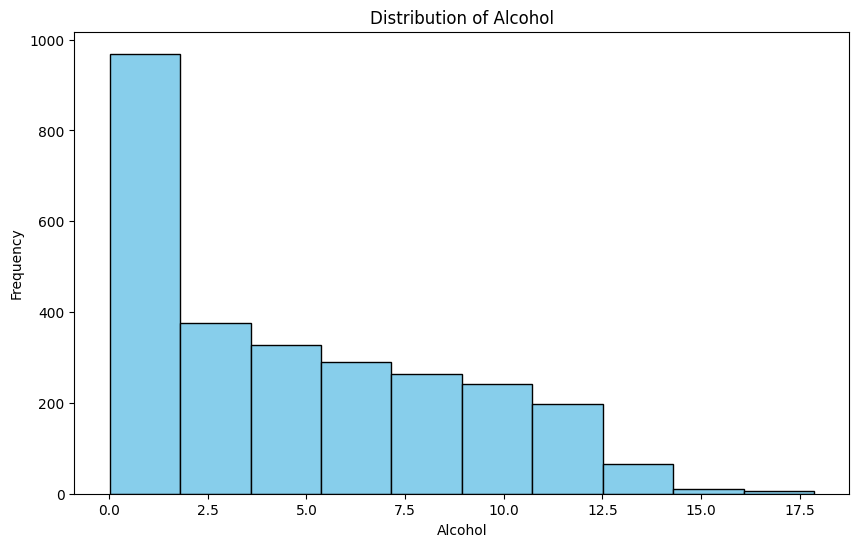

In [12]:
# Alcohol
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Alcohol'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

# Alcohol distribution skewed to the left: use median

# Doing some data cleaning

Text(0.5, 0, 'Hepatitis B')

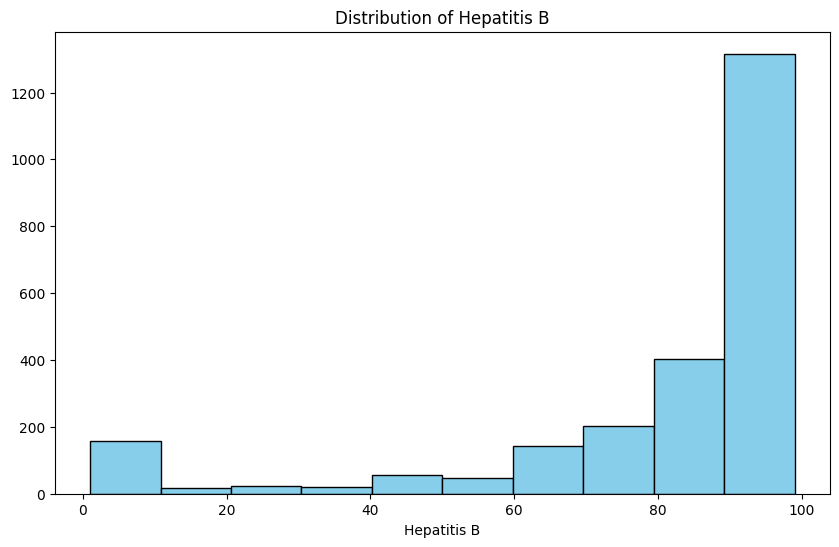

In [13]:
# Hepatitis B distribution
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Hepatitis B'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Hepatitis B')
plt.xlabel('Hepatitis B')

# Hepatitis B skewed distribution: use median

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

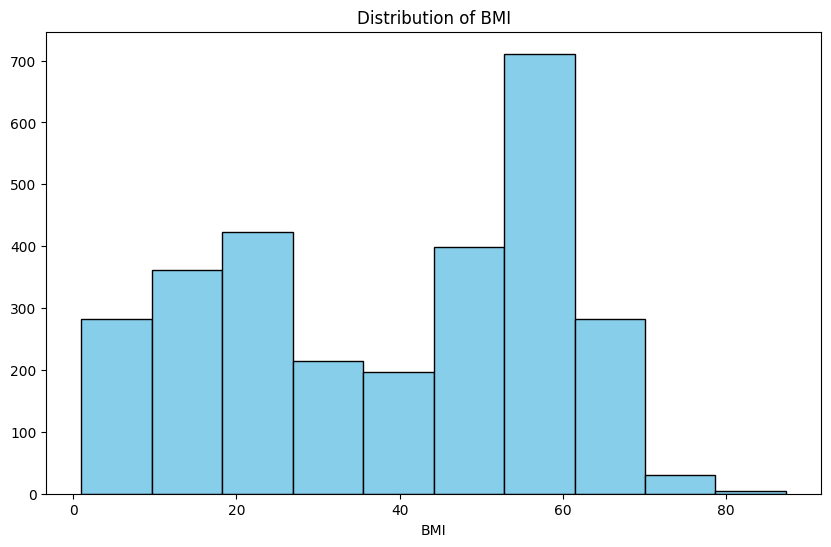

In [14]:
# BMI distribution
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy[' BMI '], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt

# BMI normal distribution : use mean

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

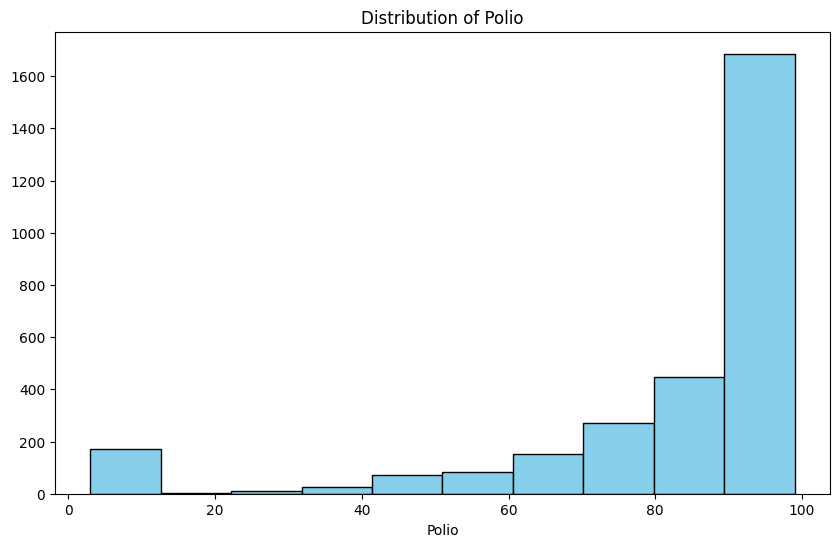

In [15]:
# Polia distribution
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Polio'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Polio')
plt.xlabel('Polio')
plt

# Polia skewed : use median

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

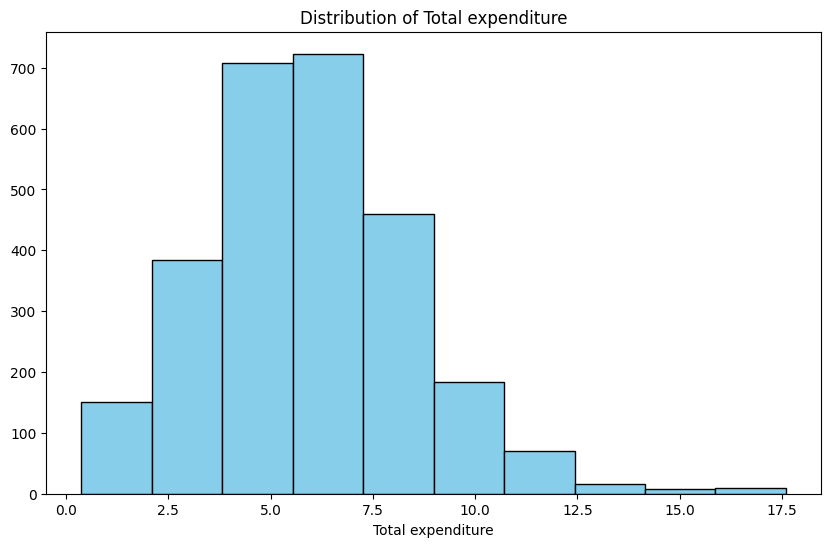

In [16]:
# Total expenditure
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Total expenditure'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total expenditure')
plt.xlabel('Total expenditure')
plt

# Total expenditure has normal distribution : use mean

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

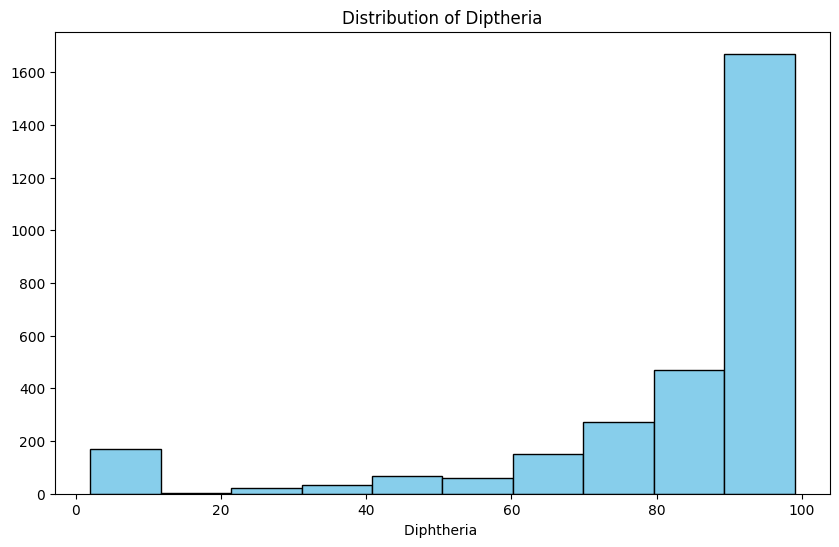

In [18]:
#Diphtheria
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Diphtheria '], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Diptheria')
plt.xlabel('Diphtheria ')
plt

# Diphtheria use median for skewed distribution

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

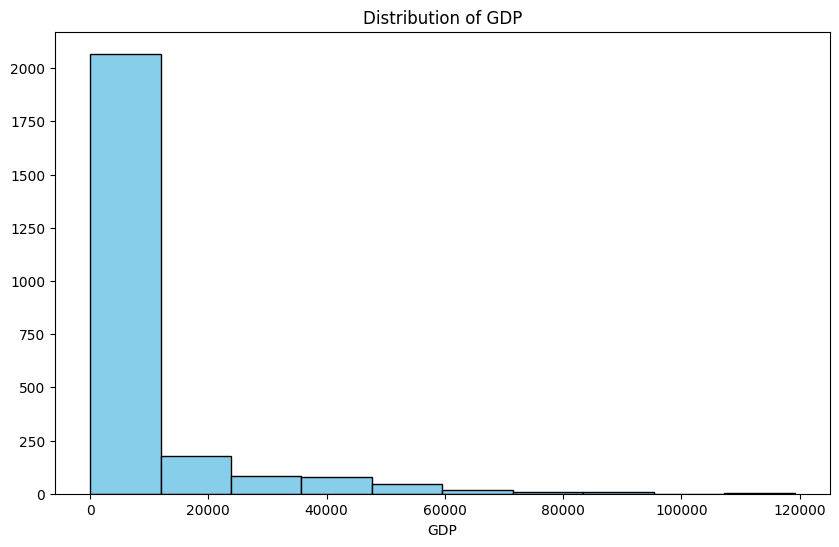

In [19]:
# GDP
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['GDP'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of GDP')
plt.xlabel('GDP')
plt

# GDP has skewed distribution : use median

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

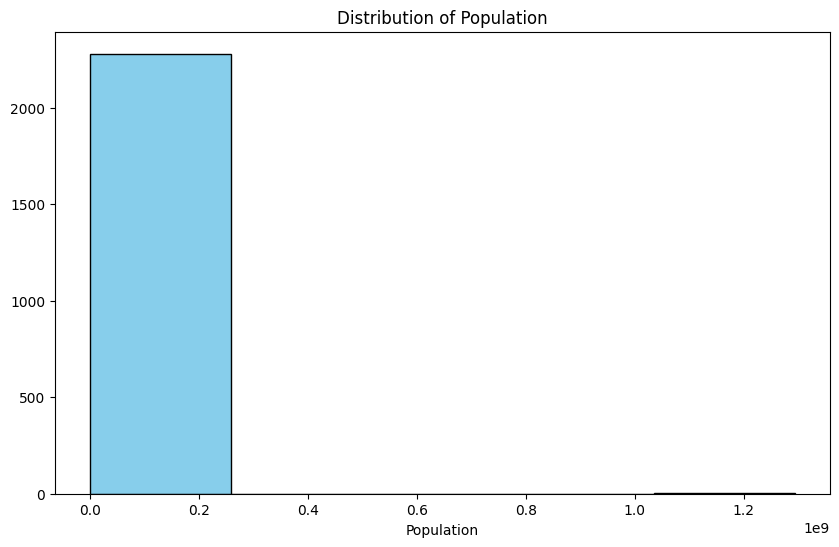

In [22]:
# population
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Population'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Population')
plt.xlabel('Population')
plt

Text(0, 0.5, 'Frequency')

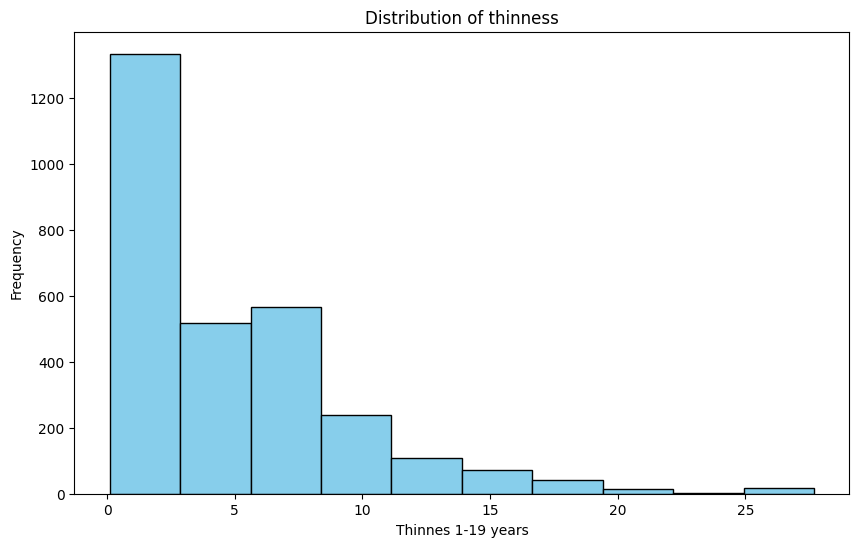

In [23]:
# thinness 1-19 year
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy[' thinness  1-19 years'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of thinness')
plt.xlabel('Thinnes 1-19 years')
plt.ylabel('Frequency')

# thinnes 1-19yrs use median

Text(0, 0.5, 'Frequency')

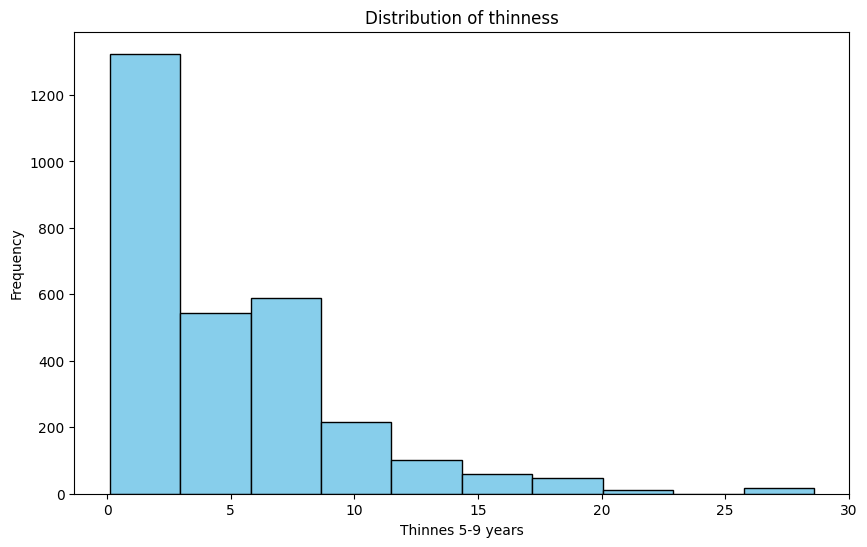

In [25]:
# thinness 5-9 years
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy[' thinness 5-9 years'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of thinness')
plt.xlabel('Thinnes 5-9 years')
plt.ylabel('Frequency')


# use median

Text(0, 0.5, 'Frequency')

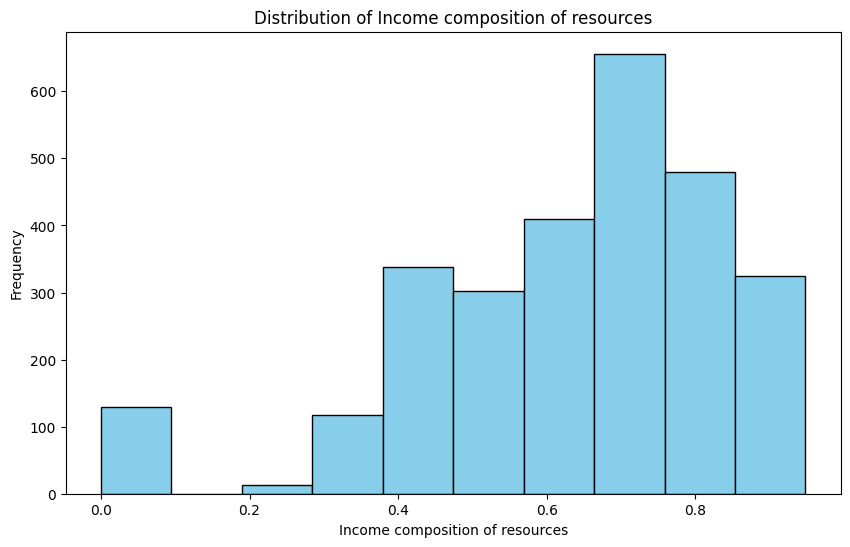

In [26]:
# income composition of resources
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Income composition of resources'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Income composition of resources')
plt.xlabel('Income composition of resources')
plt.ylabel('Frequency')

# use mean for fairl normal distribution in income composition of resources

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

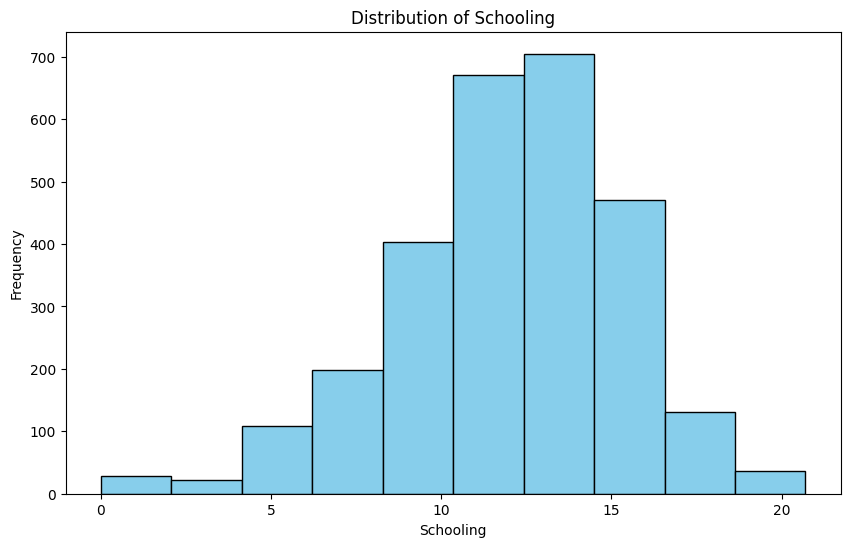

In [27]:
# schooling
plt.figure(figsize=(10, 6))
plt.hist(lifeExpectancy['Schooling'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Schooling')
plt.xlabel('Schooling')
plt.ylabel('Frequency')
plt

# use mean for schooling normal distribution

In [28]:
lifeExpectancy['Life expectancy '].fillna(lifeExpectancy['Life expectancy '].mean(), inplace=True)
lifeExpectancy['Adult Mortality'].fillna(lifeExpectancy['Adult Mortality'].median(), inplace=True)
lifeExpectancy['Alcohol'].fillna(lifeExpectancy['Alcohol'].median(), inplace=True)
lifeExpectancy['Hepatitis B'].fillna(lifeExpectancy['Hepatitis B'].median(), inplace=True)
lifeExpectancy[' BMI '].fillna(lifeExpectancy[' BMI '].mean(), inplace=True)
lifeExpectancy['Polio'].fillna(lifeExpectancy['Polio'].median(), inplace=True)
lifeExpectancy['Total expenditure'].fillna(lifeExpectancy['Total expenditure'].mean(), inplace=True)
lifeExpectancy['Diphtheria '].fillna(lifeExpectancy['Diphtheria '].median(), inplace=True)
lifeExpectancy['GDP'].fillna(lifeExpectancy['GDP'].median(), inplace=True)
lifeExpectancy['Population'].fillna(lifeExpectancy['Population'].median(), inplace=True)
lifeExpectancy[' thinness  1-19 years'].fillna(lifeExpectancy[' thinness  1-19 years'].median(), inplace=True)
lifeExpectancy[' thinness 5-9 years'].fillna(lifeExpectancy[' thinness 5-9 years'].median(), inplace=True)
lifeExpectancy['Income composition of resources'].fillna(lifeExpectancy['Income composition of resources'].mean(), inplace=True)
lifeExpectancy['Schooling'].fillna(lifeExpectancy['Schooling'].mean(), inplace=True)


<ipython-input-28-e033f75f8a78>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lifeExpectancy['Life expectancy '].fillna(lifeExpectancy['Life expectancy '].mean(), inplace=True)
<ipython-input-28-e033f75f8a78>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [29]:
lifeExpectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


# Saving cleaned data to csv file

In [30]:
lifeExpectancy.to_csv('lifeExpectancy.csv')

# World life expectancy trend over the years

In [31]:
# import pandas as pd
# import plotly.express as px

# Load your dataset (replace with your actual file path)
# df = pd.read_csv('path_to_your_dataset.csv')

# Ensure your DataFrame contains the required columns: 'Year' and 'Life expectancy '

# Group the data by 'Year' and calculate the mean life expectancy for each year
avg_life_expectancy = lifeExpectancy.groupby('Year', as_index=False)['Life expectancy '].mean()

# Create a line plot using Plotly Express
fig = px.line(
    avg_life_expectancy,
    x='Year',
    y='Life expectancy ',
    title='Average Life Expectancy Over Years',
    labels={'Life expectancy ': 'Average Life Expectancy', 'Year': 'Year'},
    markers=True
)

# Customize the layout for better visibility
fig.update_layout(
    height=500,
    width=1000,
    xaxis=dict(title='Year', tickmode='linear'),
    yaxis=dict(title='Average Life Expectancy'),
    #template='plotly_dark'
)

# Show the plot
fig.show()


The global increase in life expectancy from 2000 to 2015 was driven by several interconnected factors. During this period, significant advancements were made in healthcare, public health interventions, economic development, and social policies, which collectively contributed to better health outcomes across the world. Here's a breakdown of the key factors:

1. Improvements in Infectious Disease Control

HIV/AIDS Treatment: The widespread introduction of antiretroviral therapy (ART) in the early 2000s was transformative, especially in sub-Saharan Africa, where HIV/AIDS had led to a drastic drop in life expectancy in the 1990s. ART increased the survival rates of those living with HIV/AIDS, leading to substantial gains in life expectancy.
Vaccination Campaigns: Global immunization programs targeting diseases like measles, hepatitis B, diphtheria, and polio reduced child mortality rates. The World Health Organization (WHO) and other international health organizations supported extensive vaccination efforts, particularly in developing countries.

Malaria and Tuberculosis Control: Significant investments in preventing and treating malaria and tuberculosis (through initiatives like insecticide-treated bed nets and TB treatment programs) reduced mortality rates from these diseases, especially in regions with historically high infection rates.

2. Reduction in Child and Maternal Mortality

Improved Maternal and Child Healthcare: Investments in maternal healthcare, such as better access to prenatal care, skilled birth attendants, and emergency obstetric services, resulted in lower infant deaths and maternal mortality rates.

Under-Five Mortality: Focused interventions, like oral rehydration therapy for diarrhea, nutritional supplements, and breastfeeding promotion, drastically reduced under-five deaths, particularly in low-income countries.

3. Increased Global Health Spending and Economic Growth
Total Healthcare Expenditure: Countries around the world, especially middle-income countries, increased their healthcare budgets. This allowed for better infrastructure, access to medications, and healthcare services.

Rising GDP: Higher GDP per capita in many developing countries translated into improved living standards, better nutrition, and increased access to healthcare services, all contributing to increased life expectancy.

4. Public Health Campaigns and Lifestyle Changes

Control of Non-Communicable Diseases (NCDs): As countries became more developed, they shifted their focus to managing chronic diseases like cardiovascular disease, diabetes, and cancer. Efforts to reduce alcohol consumption and promote healthier lifestyles contributed to lower mortality rates from NCDs.

Health Education and Awareness: Campaigns promoting healthier diets, physical activity, and reduced smoking helped prevent lifestyle-related diseases, especially in high-income countries.

5. Advances in Medical Technology and Access to Healthcare
Medical Advancements: Technological innovations, such as improved diagnostics, new pharmaceuticals, and better surgical techniques, enhanced the ability to treat diseases effectively.
Access to Medicines: Increased availability of generic medicines, especially for chronic diseases and infections, made treatments more affordable and accessible, even in low-income regions.

6. Improved Nutrition and Sanitation

Nutrition: Programs to combat malnutrition, especially among children, led to better growth outcomes and reduced child mortality rates. Supplementation programs (like vitamin A, iron, and folic acid) were implemented in many developing countries.

Clean Water and Sanitation: Investments in sanitation infrastructure, clean water access, and waste management reduced the incidence of water-borne diseases like cholera and diarrhea, which previously caused high mortality rates, especially among children.

7. Global Health Initiatives and Collaboration

Millennium Development Goals (MDGs): The MDGs set by the United Nations in 2000 included targets to reduce child mortality, improve maternal health, and combat infectious diseases. These goals catalyzed efforts by governments, NGOs, and international agencies to prioritize health interventions.

Global Funding: Increased funding from organizations like the Global Fund to Fight AIDS, Tuberculosis, and Malaria, Gavi, the Vaccine Alliance, and other donors played a significant role in scaling up life-saving interventions.

Summary

Between 2000 and 2015, the combination of targeted global health initiatives, economic growth, healthcare improvements, and public health interventions significantly increased life expectancy worldwide. The greatest progress was seen in low- and middle-income countries, which managed to reduce the burden of infectious diseases and improve maternal and child health.

Overall, the world saw a shift from focusing on infectious disease control to addressing the challenges of non-communicable diseases, resulting in increased longevity and better quality of life globally



**2009-2010**


- Between 2009 and 2010, several significant world events and crises impacted global health, potentially contributing to a decline or stagnation in average life expectancy in some regions. Here are some key factors that might have affected health outcomes during that period:

1. Global Financial Crisis

The aftermath of the global financial crisis led to economic downturns across the world, reducing government budgets for healthcare, social services, and public health initiatives.

- Effect on Life Expectancy: High unemployment rates, reduced income, and budget cuts in social services could have contributed to poorer health outcomes, especially in low- and middle-income countries where people were already vulnerable.
Countries Affected: The crisis had a global impact, but it particularly affected countries like Greece, Spain, and developing economies that were more reliant on external funding.

2. H1N1 Influenza Pandemic (Swine Flu) (2009-2010)

Impact: The H1N1 pandemic, which started in April 2009, led to millions of infections worldwide and caused significant mortality, especially among younger adults and those with underlying health conditions.
Effect on Life Expectancy: While the overall fatality rate of H1N1 was lower than past pandemics, the sudden strain on healthcare systems and the deaths among younger adults could have contributed to a temporary decline in life expectancy in some regions.
Countries Affected: The pandemic affected nearly every country, with high case counts in the United States, India, Mexico, and Brazil.

3. HIV/AIDS Epidemic in Sub-Saharan Africa

Impact: Despite progress in combating HIV/AIDS, the epidemic continued to take a toll on life expectancy in many African countries during this period. Limited access to antiretroviral therapy, especially in rural areas, exacerbated the issue.
Effect on Life Expectancy: High adult mortality rates due to AIDS-related complications in countries like South Africa, Zimbabwe, and Botswana continued to suppress life expectancy figures.
4. Natural Disasters

Haiti Earthquake (January 2010):
One of the deadliest earthquakes in recent history struck Haiti, killing over 200,000 people and causing widespread infrastructure damage, including hospitals and clinics.
Effect on Life Expectancy: The collapse of healthcare services and the spread of diseases like cholera significantly impacted the health of survivors.
Pakistan Floods (July-August 2010):
Severe floods affected over 20 million people in Pakistan, leading to a public health crisis, food shortages, and displacement.
Effect on Life Expectancy: The destruction of healthcare facilities and the outbreak of waterborne diseases such as cholera and malaria affected vulnerable populations.

5. Increased Food Insecurity

Impact: Following the financial crisis, food prices surged globally, leading to food insecurity, particularly in developing nations. The rising cost of basic necessities pushed many into poverty.
Effect on Life Expectancy: Malnutrition and lack of access to essential resources can directly impact mortality rates, especially among children and the elderly.

6. **Conflicts and Political Instability**

Impact: Ongoing conflicts in regions like Afghanistan, Iraq, Somalia, and parts of Africa (e.g., the Darfur conflict in Sudan) continued to disrupt healthcare infrastructure, reduce access to basic services, and displace large populations.
Effect on Life Expectancy: High mortality rates due to conflict, lack of medical care, and poor living conditions in refugee camps contributed to stagnation or declines in life expectancy in these regions.

# Summary

The combined effect of economic strain, health pandemics, natural disasters, conflict, and food insecurity between 2009 and 2010 likely contributed to the slowdown in growth of average life expectancy globally, particularly in vulnerable regions. These events strained healthcare systems, reduced funding for public health initiatives, and disproportionately affected poorer populations, which may have impacted mortality rates during that period.

# Correlation matrix overview

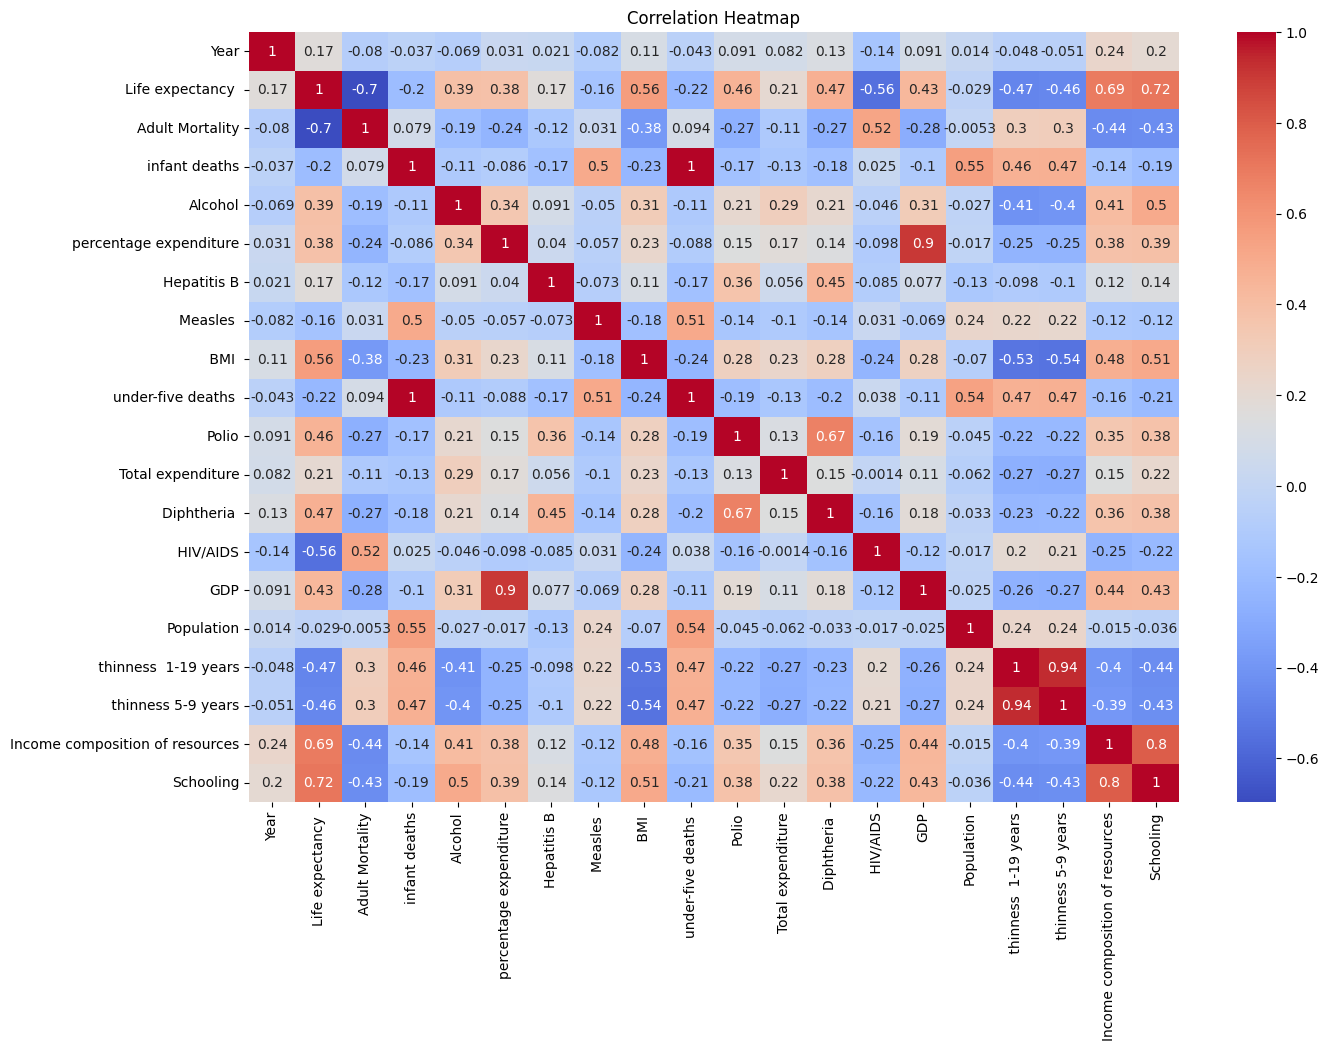

In [33]:
#Select only numeric columns for correlation
life_expectancy_numeric = lifeExpectancy.select_dtypes(include=['float64', 'int64'])

#Heatmap to show correlation
plt.figure(figsize=(15, 10))
sns.heatmap(life_expectancy_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Getting status categories

In [32]:
lifeExpectancy['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


# **Life expectancy between developed and developing countries**

In [ ]:
# Calculate the average life expectancy for developed and developing countries
avg_life_expectancy = lifeExpectancy.groupby('Status', as_index=False)['Life expectancy '].mean()

# Create a bar plot using Plotly Express
fig = px.bar(
    avg_life_expectancy,
    x='Status',
    y='Life expectancy ',
    color='Status',
    title='Average Life Expectancy: Developed vs Developing Countries',
    labels={'Life expectancy ': 'Average Life Expectancy', 'Status': 'Country Status'},
    text_auto=True
)

# Customize the layout for better visibility
fig.update_layout(
    height=500,
    width=800,
    xaxis_title='Country Status',
    yaxis_title='Average Life Expectancy',
    #template='plotly_dark'
)

# Show the plot
fig.show()


The disparity in life expectancy between developed and developing countries can be influenced by a wide range of factors. Drawing insights from the columns in your dataset, here are some key factors that may contribute to this gap:

1. Adult Mortality Rate

Explanation: Higher adult mortality rates in developing countries can result from limited access to healthcare, poor medical infrastructure, and a higher prevalence of infectious diseases.
Impact: High mortality rates reduce the average lifespan, as more adults die from preventable causes, including chronic diseases and infections.

2. Infant Deaths and Under-Five Deaths

Explanation: Infant mortality and under-five deaths are significantly higher in developing countries due to inadequate prenatal care, malnutrition, lack of vaccinations, and poor sanitation.
Impact: Higher infant and child mortality rates drag down the overall life expectancy, especially in regions with limited healthcare resources.

3. Access to Vaccinations (e.g., Hepatitis B, Polio, Diphtheria)

Explanation: Immunization coverage for diseases like Hepatitis B, Polio, and Diphtheria is often lower in developing countries due to inadequate healthcare infrastructure, leading to higher incidence of preventable diseases.
Impact: Lower vaccination rates increase the risk of outbreaks and higher child mortality, reducing life expectancy.

4. HIV/AIDS Prevalence

Explanation: Developing countries, especially in Sub-Saharan Africa, have been disproportionately affected by the HIV/AIDS epidemic, which leads to higher mortality rates among adults.
Impact: A high prevalence of HIV/AIDS reduces life expectancy significantly due to the lack of widespread access to antiretroviral therapy.

5. Healthcare Expenditure (Total Expenditure, Percentage Expenditure)

Explanation: Developed countries typically allocate a larger proportion of their GDP to healthcare, resulting in better medical services, disease prevention, and access to advanced treatments.
Impact: Inadequate healthcare funding in developing countries leads to poor health outcomes, shorter lifespans, and a higher burden of disease.

6. Alcohol Consumption

Explanation: Excessive alcohol consumption can contribute to liver diseases, accidents, and other health problems, especially in regions where there is less awareness of its effects or limited access to treatment for addiction.
Impact: The impact of alcohol on life expectancy can vary; in some developing regions, excessive consumption is linked with a lack of education on its risks.

7. GDP and Population

Explanation: Higher GDP per capita in developed countries often correlates with better living standards, access to healthcare, education, and improved infrastructure.
Impact: Economic stability allows developed countries to invest in public health, leading to longer life expectancy, while developing nations face challenges in providing basic healthcare.

8. Nutrition and BMI

Explanation: Malnutrition (both undernutrition and obesity) significantly impacts health. Developing countries may suffer from undernutrition, while developed countries face challenges with obesity due to sedentary lifestyles.
Impact: Poor nutrition weakens the immune system, increases susceptibility to diseases, and can lead to higher mortality rates, especially in young children.

9. Education and Schooling

Explanation: Education is a crucial determinant of health, as higher levels of education are associated with better health literacy, healthier lifestyles, and increased access to healthcare.
Impact: Developed countries generally have higher education levels, which translate into better health outcomes and longer life expectancy.

10. Income Composition of Resources

Explanation: This metric reflects the availability of resources (income, housing, services) necessary for a healthy life. Developing countries often lack equitable distribution of resources, leading to health disparities.
Impact: Better resource allocation in developed countries contributes to improved living conditions, thus enhancing life expectancy.

Summary

In essence, access to healthcare, economic stability, nutrition, education, and disease prevention play crucial roles in determining the life expectancy of a population. Developed countries generally excel in these areas, while developing countries face significant challenges due to limited resources, inadequate healthcare infrastructure, and higher rates of preventable diseases.

Addressing these disparities requires a multi-faceted approach, focusing on improving healthcare access, increasing immunization coverage, enhancing education, and ensuring equitable resource distribution

# Life expectancy of developed vs developing countries from 2000 - 2015

In [ ]:
#lifeExpectancy.columns

# Group by 'Status' and 'Year' to calculate the average life expectancy for each year and status
grouped_df = lifeExpectancy.groupby(['Year', 'Status'])['Life expectancy '].mean().reset_index()

# Plot the line graph using Plotly Express
fig = px.line(
    grouped_df,
    x='Year',  # Time axis (Years)
    y='Life expectancy ',  # Y-axis represents life expectancy
    color='Status',  # Color lines based on 'Status' (Developed vs. Developing)
    title='Life Expectancy Over Time for Developed and Developing Countries',
    labels={'Life expectancy ': 'Average Life Expectancy', 'Year': 'Year', 'Status': 'Country Status'},  # Axis labels
    markers=True  # Add markers to each data point
)

# Customize layout if necessary
fig.update_layout(
    height=600,
    width=900,
    xaxis_title='Year',
    yaxis_title='Life Expectancy',
    #template='plotly_dark',  # Optional: dark theme for the plot
)

# Show the plot
fig.show()


# Factors accounting for increase in life expectancy from 2000 - 2015

- Life expectancy in developed countries consistently rose from 76.8 years to 80.6 years from 2000 to 2015 respectively.
- Life expectancy in developing countries rose from 64.6 year to 69.7 years from 2000 to 2015 respectively.

Between 2000 and 2015, life expectancy increased significantly in both developed and developing countries. This improvement can be attributed to a combination of factors related to healthcare, economic development, and public health policies. Let's break down the key contributors, using some of the columns from your dataset for context:

1. Improved Healthcare Access and Technology

Vaccinations (Hepatitis B, Polio, Diphtheria, Measles): Widespread vaccination campaigns have been crucial in reducing mortality from preventable diseases. For example, increased vaccination rates against diseases like Hepatitis B, Polio, Diphtheria, and Measles have drastically reduced child mortality in both developed and developing regions.

HIV/AIDS Treatment: The introduction of antiretroviral therapy (ART) in the early 2000s made a huge impact, especially in sub-Saharan Africa, where HIV/AIDS had severely reduced life expectancy. Global efforts significantly lowered HIV-related deaths, improving life expectancy in affected regions.

Maternal and Child Health: Better access to prenatal care, improvements in infant healthcare, and reducing infant deaths have played significant roles, especially in developing countries. Programs focusing on maternal health have also helped decrease mortality rates for both mothers and infants.

2. Economic Growth and Increased Healthcare Spending

GDP and Total Expenditure: Increased economic growth, especially in developing countries, provided governments with the resources to invest in healthcare infrastructure, education, and social services. Countries that experienced economic growth were able to allocate a higher percentage of expenditure towards healthcare, leading to better health outcomes.

Alcohol and Tobacco Control: In both developed and developing countries, public health campaigns targeting lifestyle diseases have been crucial. Reducing excessive alcohol consumption and smoking rates have had long-term positive effects on adult mortality rates.

3. Improvements in Nutrition and Lifestyle

BMI (Body Mass Index): Increased awareness of diet, exercise, and healthier lifestyles contributed to improved life expectancy. In developed countries, there's been a focus on reducing obesity, while in developing countries, efforts have focused on combating malnutrition.

Schooling and Education: Higher levels of education are strongly correlated with better health outcomes. Education leads to healthier behaviors, better health literacy, and more economic opportunities, ultimately improving life expectancy.

4. Sanitation, Clean Water, and Infrastructure

Access to clean water and improved sanitation has been crucial in reducing infectious diseases, particularly in developing countries. These changes have helped lower deaths from diseases like diarrhea, which disproportionately affect children.

Investments in public health infrastructure (hospitals, clinics, and healthcare workers) have enhanced the ability to respond to health crises and provide ongoing care.

5. Global Health Initiatives and Policy Changes

Global Health Programs: International organizations (like the WHO, UNICEF, and NGOs) have funded projects targeting malaria, tuberculosis, HIV/AIDS, and maternal health, which significantly improved health outcomes in developing countries.

The Millennium Development Goals (MDGs), particularly the focus on reducing child mortality, improving maternal health, and combating diseases, were significant drivers of improvements during this period.

**Summary**

The convergence of these factors led to a noticeable increase in life expectancy between 2000 and 2015. In developed countries, advancements in technology, healthcare policies, and chronic disease management contributed to prolonged life expectancy. Meanwhile, in developing countries, global aid, vaccination programs, economic growth, and improvements in basic healthcare played pivotal roles in enhancing life expectancy.

Both sets of countries benefited from advancements in healthcare access, but the challenges and solutions varied according to the level of economic development and healthcare infrastructure.

# Adult and Infant Mortality Comparison between Developed and Developing Countries

In [34]:
# Group by 'Status' and 'Year' to calculate the average for Adult Mortality and Infant Deaths
grouped_df = lifeExpectancy.groupby(['Year', 'Status']).agg({
    'Adult Mortality': 'mean',
    'infant deaths': 'mean'
}).reset_index()

# Create a Plotly figure
fig = go.Figure()

# Add line plots for Adult Mortality
fig.add_trace(go.Scatter(
    x=grouped_df[grouped_df['Status'] == 'Developed']['Year'],
    y=grouped_df[grouped_df['Status'] == 'Developed']['Adult Mortality'],
    mode='lines+markers',
    name='Adult Mortality (Developed)',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=grouped_df[grouped_df['Status'] == 'Developing']['Year'],
    y=grouped_df[grouped_df['Status'] == 'Developing']['Adult Mortality'],
    mode='lines+markers',
    name='Adult Mortality (Developing)',
    line=dict(color='red')
))

# Add line plots for Infant Deaths
fig.add_trace(go.Scatter(
    x=grouped_df[grouped_df['Status'] == 'Developed']['Year'],
    y=grouped_df[grouped_df['Status'] == 'Developed']['infant deaths'],
    mode='lines+markers',
    name='Infant Deaths (Developed)',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=grouped_df[grouped_df['Status'] == 'Developing']['Year'],
    y=grouped_df[grouped_df['Status'] == 'Developing']['infant deaths'],
    mode='lines+markers',
    name='Infant Deaths (Developing)',
    line=dict(color='orange')
))

# Customize the layout
fig.update_layout(
    title='Trends in Adult Mortality and Infant Deaths Over the Years by Status',
    xaxis_title='Year',
    yaxis_title='Rate',
    legend_title='Indicator',
    #template='plotly_dark',  # Optional: dark theme for the plot
    height=500,
    width=1200
)

# Show the plot
fig.show()


Several key factors contribute to the higher infant deaths and adult mortality rates in developing countries compared to developed countries. These factors can be attributed to differences in healthcare access, infrastructure, socio-economic conditions, and public health policies. Below are the major contributors:

1. Healthcare Access and Quality

Limited Access to Healthcare: In developing countries, access to healthcare can be limited, especially in rural or underserved areas. Many individuals in developing countries do not have access to basic healthcare services, including prenatal and maternal care, vaccination, and emergency healthcare.

Lack of Skilled Birth Attendants: In many developing countries, there is often a shortage of skilled healthcare professionals (e.g., doctors, nurses, midwives). This increases the risk of complications during childbirth, which contributes to higher infant mortality and adult mortality.

Inadequate Treatment for Common Diseases: Common preventable diseases like pneumonia, diarrhea, and malaria often have higher mortality rates in developing countries due to insufficient access to medications or lack of proper treatment facilities.

2. Malnutrition and Poor Nutrition

Malnutrition: Malnutrition is a significant issue in many developing countries, particularly among children and pregnant women. Inadequate nutrition can lead to weakened immune systems and increased susceptibility to diseases, contributing to higher infant mortality (e.g., through low birth weight, infections, or premature births) and higher adult mortality (e.g., cardiovascular disease, diabetes).

Infant and Child Feeding Practices: In developing countries, children may suffer from lack of breastfeeding or poor complementary feeding practices, leading to malnutrition and increased risk of infections that can contribute to infant death.

3. Infectious Diseases and Lack of Immunization

Higher Prevalence of Infectious Diseases: Developing countries often face higher rates of infectious diseases such as HIV/AIDS, tuberculosis, malaria, diphtheria, measles, and polio. The lack of widespread vaccination programs and inadequate healthcare infrastructure result in higher mortality rates from these diseases.

HIV/AIDS: Many developing countries, especially in sub-Saharan Africa, have higher HIV/AIDS prevalence rates. Without adequate access to antiretroviral therapy (ART), people living with HIV are at a higher risk of dying from AIDS-related illnesses, contributing to adult mortality.

4. Sanitation and Clean Water

Poor Sanitation and Lack of Clean Water: Unsafe drinking water and poor sanitation are significant contributors to the spread of waterborne diseases like cholera, diarrhea, and typhoid, which can lead to high infant mortality rates. Lack of proper waste disposal and hygiene practices also exacerbate the spread of these diseases.

Infant and Child Deaths: Poor sanitation and contaminated water contribute to high rates of diarrheal diseases in children, which is a leading cause of infant mortality in many developing countries.

5. Economic Factors

Low GDP and Poverty: Countries with lower Gross Domestic Product (GDP) often face widespread poverty, which limits the ability to invest in healthcare infrastructure, education, and nutrition programs. This directly affects adult mortality, as people in poverty have less access to medical care, proper nutrition, and preventive health measures.

Income Inequality: In developing countries, inequality in income and access to services leads to disparities in health outcomes. Wealthier individuals may have access to better healthcare, while the poor are left without basic services, increasing mortality rates.

6. Adult Lifestyle Factors

Alcohol Consumption and Smoking: High levels of alcohol consumption and smoking are risk factors for diseases like liver disease, lung cancer, and heart disease, which contribute to higher adult mortality in both developing and developed countries. However, in developing countries, lifestyle diseases are often diagnosed late, which makes them more deadly.

Obesity: In some developing nations, rapid urbanization and changing dietary patterns (e.g., high-fat, low-nutrient foods) have led to rising rates of obesity, which can increase the risk of diseases such as cardiovascular disease and diabetes.

7. Maternal Mortality

High Maternal Mortality: The lack of access to skilled birth attendants, safe delivery services, and prenatal care results in high maternal mortality in developing countries. Many women face complications during childbirth (e.g., hemorrhage, infection, eclampsia) that cannot be treated promptly, leading to preventable deaths.

Unsafe Abortions: In some developing countries, unsafe abortion practices due to legal restrictions or lack of access to reproductive health services contribute to maternal death.

8. Political Instability and Conflict

Civil Wars and Political Instability: In countries affected by war, political instability, and conflict, healthcare systems break down, which leads to a lack of essential services. This results in increased mortality from both diseases and violent injuries.

Displacement: Conflict and natural disasters often lead to displacement and refugee crises, where access to healthcare, food, clean water, and sanitation is severely limited, contributing to higher mortality rates.

9. Environmental Factors

Air Pollution: In many developing countries, particularly those with rapidly growing urban populations, air pollution is a significant environmental health risk. Poor air quality can lead to respiratory diseases, cardiovascular diseases, and premature death in adults.

Climate Change: Changes in the climate, such as extreme weather events (e.g., floods, droughts), can exacerbate food and water insecurity, leading to malnutrition, dehydration, and higher death rates, especially among vulnerable populations in developing countries.

**Key Contributing Factors:**

-Inadequate healthcare infrastructure

-Malnutrition and poor nutrition

-Higher prevalence of infectious diseases

-Poor sanitation and lack of clean water

-Lower GDP and economic challenges

-Maternal and child health challenges

-Unhealthy lifestyle factors (alcohol, smoking, obesity)

-Political instability and conflict

-Environmental pollution and climate-related issues

**Summary**

In developed countries, the higher standard of living, better access to healthcare, and effective public health policies have led to significant reductions in both adult mortality and infant deaths. In contrast, developing countries often struggle with the above challenges, leading to the observed disparities in life expectancy.

# Life expectancy vs GDP over the years

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your dataframe is loaded into `df`
# df = pd.read_csv('path_to_your_dataset.csv')

# Group by 'Status' and calculate the average GDP per capita for each group
gdp_comparison = lifeExpectancy.groupby('Status')['GDP'].mean().reset_index()

# Create a horizontal bar plot using Plotly Express
fig = px.bar(
    gdp_comparison,
    x='GDP',
    y='Status',
    orientation='h',  # Horizontal bar chart
    title='GDP per Capita Comparison between Developed and Developing Countries',
    labels={'GDP': 'Average GDP per Capita (in USD)', 'Status': 'Country Status'},
    color='Status',  # Color bars by Status for better differentiation
    color_discrete_map={'Developed': 'blue', 'Developing': 'red'}  # Custom colors
)

# Show the plot
fig.show()


**The Link Between GDP and Life Expectancy**

Higher GDP enables countries to invest in healthcare, nutrition, sanitation, education, and infrastructure, which collectively contribute to lower mortality rates and higher life expectancy.
Lower GDP often results in insufficient access to these basic services, leading to higher rates of infant mortality, adult mortality, and disease prevalence.

The disparity in GDP between developed and developing countries is a major factor in the life expectancy gap, with wealthier nations benefiting from better overall health outcomes.

Therefore, GDP is a key determinant of life expectancy, as it directly affects the availability and quality of healthcare, nutrition, and public health services, all of which are critical for improving the lifespan of a population.



# **GDP Trend over time Comparison between developing and developed Countries**

In [ ]:
# import pandas as pd
# import plotly.graph_objects as go


# Group by 'Status' and 'Year' to calculate the average GDP for each group
grouped_df = lifeExpectancy.groupby(['Year', 'Status']).agg({
    'GDP': 'mean'
}).reset_index()

# Create a Plotly figure
fig = go.Figure()

# Add a line plot for GDP (Developed countries)
fig.add_trace(go.Scatter(
    x=grouped_df[grouped_df['Status'] == 'Developed']['Year'],
    y=grouped_df[grouped_df['Status'] == 'Developed']['GDP'],
    mode='lines+markers',
    name='GDP (Developed)',
    line=dict(color='blue')
))

# Add a line plot for GDP (Developing countries)
fig.add_trace(go.Scatter(
    x=grouped_df[grouped_df['Status'] == 'Developing']['Year'],
    y=grouped_df[grouped_df['Status'] == 'Developing']['GDP'],
    mode='lines+markers',
    name='GDP (Developing)',
    line=dict(color='green')
))

# Customize the layout of the plot
fig.update_layout(
    title='Trend in GDP Over the Years by Country Status',
    xaxis_title='Year',
    yaxis_title='Average GDP',
    legend_title='Country Status',
    template='plotly_white',  # Optional: use a light theme for the plot
    height=600,
    width=900
)

# Show the plot
fig.show()


The increase in GDP of developing countries has significantly improved life expectancy by enabling greater investment in healthcare, infrastructure, and social services.

As GDP rises, these countries can allocate more resources to improve public health systems, making essential medical treatments and preventive care more accessible to larger segments of the population.

Enhanced healthcare infrastructure, such as better-equipped hospitals, increased availability of vaccines, and improved maternal and child health services, directly reduce mortality rates.

Additionally, higher GDP supports improvements in nutrition, sanitation, education, and environmental conditions, all of which contribute to healthier lifestyles and longer life expectancy. Consequently, these economic improvements help reduce the disparities in life expectancy between developing and developed nations.

# HIV prevalence in developed vs developing countries

In [ ]:
# import pandas as pd
# import plotly.express as px

# Group by 'Status' and calculate the average HIV/AIDS prevalence for each group
hiv_comparison = lifeExpectancy.groupby('Status')[' HIV/AIDS'].mean().reset_index()

# Create a horizontal bar plot using Plotly Express
fig = px.bar(
    hiv_comparison,
    x=' HIV/AIDS',
    y='Status',
    orientation='h',  # Horizontal bar chart
    title='HIV/AIDS Prevalence Comparison between Developed and Developing Countries',
    labels={'HIV/AIDS': 'Average HIV/AIDS Prevalence (%)', 'Status': 'Country Status'},
    color='Status',  # Color bars by Status for differentiation
    color_discrete_map={'Developed': 'blue', 'Developing': 'red'}  # Custom colors for differentiation
)

# Show the plot
fig.show()


The prevalence of HIV/AIDS has contributed significantly to the disparity in life expectancy between developing and developed countries.

- In developed countries, robust healthcare systems, widespread access to antiretroviral therapy, and comprehensive public health education have helped reduce HIV transmission and manage the disease effectively, allowing people with HIV to live longer and healthier lives.

- In contrast, many developing countries, particularly in sub-Saharan Africa, struggle with limited healthcare resources, inadequate access to treatments, and less widespread prevention programs. As a result, HIV/AIDS remains a leading cause of premature death in these regions, contributing to higher mortality rates and lower life expectancy.

The unequal distribution of healthcare services and resources has made it difficult for developing countries to manage the HIV/AIDS epidemic, further exacerbating the gap in life expectancy between these nations and their developed counterparts.

# Hepatits B

In [ ]:
# import pandas as pd
# import plotly.express as px

# Assuming df is your dataframe
# Group by 'Status' and 'Year', then calculate the mean of Hepatitis B for each group
df_grouped = lifeExpectancy.groupby(['Status', 'Year'], as_index=False)['Hepatitis B'].mean()

# Plot using Plotly
fig = px.line(df_grouped, x='Year', y='Hepatitis B', color='Status',
              labels={'Hepatitis B': 'Hepatitis B Vaccination Rate'},
              title='Hepatitis B Trend Over Time by Status (Developed vs Developing)')

fig.show()


The disparity in life expectancy between developing and developed countries has been significantly influenced by the availability and effectiveness of Hepatitis B vaccinations.

- In developed countries, widespread access to Hepatitis B vaccines as part of routine immunization programs has led to a sharp decline in the prevalence of chronic Hepatitis B infections, which can cause liver disease, cirrhosis, and liver cancer. This has contributed to longer life expectancy, as Hepatitis B is effectively prevented or treated.

- In contrast, many developing countries, particularly those with limited healthcare infrastructure, struggle with low vaccine coverage and insufficient public health programs. As a result, Hepatitis B remains a major health threat in these regions, causing higher rates of liver-related illnesses and premature deaths, which in turn lowers life expectancy.

The unequal access to vaccination programs is a key factor in the ongoing health gap between developed and developing nations.

# Body Mass Index (BMI)


In [ ]:
# import pandas as pd
# import plotly.express as px

# Group by 'Status' and calculate the average HIV/AIDS prevalence for each group
hiv_comparison = lifeExpectancy.groupby('Status')[' BMI '].mean().reset_index()

# Create a horizontal bar plot using Plotly Express
fig = px.bar(
    hiv_comparison,
    x=' BMI ',
    y='Status',
    orientation='h',  # Horizontal bar chart
    title='BMI Comparison between Developed and Developing Countries',
    labels={'BMI': 'Average BMI', 'Status': 'Country Status'},
    color='Status',  # Color bars by Status for differentiation
    color_discrete_map={'Developed': 'blue', 'Developing': 'red'}  # Custom colors for differentiation
)

# Show the plot
fig.show()


lldldl

In [ ]:
# import pandas as pd
# import plotly.express as px

# Assuming df is your dataframe
# Group by 'Status' and 'Year', then calculate the mean of BMI for each group
df_grouped = lifeExpectancy.groupby(['Status', 'Year'], as_index=False)[' BMI '].mean()

# Plot using Plotly
fig = px.line(df_grouped, x='Year', y=' BMI ', color='Status',
              labels={' BMI ': 'Average BMI'},
              title='BMI Trend Over Time by Status (Developed vs Developing)')

fig.show()


BMI (Body Mass Index) is a measure of body fat based on a person's weight and height, and it plays a crucial role in determining overall health and life expectancy.

- A high BMI (overweight or obesity) is associated with an increased risk of chronic health conditions such as heart disease, diabetes, hypertension, and certain cancers, which can lead to a shorter life expectancy.

- On the other hand, a low BMI (underweight) may indicate malnutrition or underlying health problems, weakening the immune system and increasing the risk of infections, anemia, and other health issues that can also shorten life expectancy.

Maintaining a healthy BMI within the normal range (18.5 to 24.9) is important for promoting overall health, reducing disease risk, and enhancing longevity.

- An increase in BMI in developing countries may be a sign of improved nutrition which can boost life expectancy. However, a high BMI may lower life expectancy in developed countries as obesity has become a big issue.

# Outliers

# Life expectancy in top 3 vs bottom 3 countries

In [ ]:
# import pandas as pd
# import plotly.express as px

# Create a Plotly boxplot for Life Expectancy by Status
fig = px.box(lifeExpectancy, x='Life expectancy ', y='Status',
             labels={'Life expectancy ': 'Life Expectancy'},
             title='Life Expectancy Distribution by Country Status (Developed vs Developing)',
             orientation='h')  # 'h' for horizontal boxplot

# Show the plot
fig.show()


ldlldld

In [ ]:
# Group by 'Country' and calculate the average life expectancy for each country
avg_life_expectancy = lifeExpectancy.groupby('Country', as_index=False)['Life expectancy '].mean()

# Sort the DataFrame to get the top 3 and bottom 3 countries with the highest and lowest life expectancy
top_3 = avg_life_expectancy.nlargest(3, 'Life expectancy ')
bottom_3 = avg_life_expectancy.nsmallest(3, 'Life expectancy ')

# Concatenate the top and bottom countries to compare them
comparison_df = pd.concat([top_3, bottom_3])

# Create a bar plot using Plotly Express
fig = px.bar(
    comparison_df,
    x='Country',
    y='Life expectancy ',
    color='Country',
    title='Top 3 and Bottom 3 Countries with Highest and Lowest Life Expectancy',
    labels={'Life expectancy ': 'Life Expectancy', 'Country': 'Country'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Customize the layout for better visibility
fig.update_layout(
    height=500,
    width=800,
    xaxis_title='Country',
    yaxis_title='Life Expectancy',
    #template='plotly_dark'
)

# Show the plot
fig.show()


The significant difference in life expectancy between countries like Japan, Iceland, and Sweden (high life expectancy) and Sierra Leone, Central African Republic, and Lesotho (low life expectancy) can be attributed to a combination of several socioeconomic, healthcare, and environmental factors. Let’s explore these talking points to understand why this disparity exists:

1. Adult Mortality

Japan, Iceland, Sweden: These countries have low adult mortality rates due to advanced healthcare systems, effective disease prevention programs, and access to quality medical care. Their healthcare systems are well-funded and efficient, ensuring the early detection and treatment of diseases.

Sierra Leone, Central African Republic, Lesotho: In contrast, these countries have high adult mortality rates, often due to a lack of access to healthcare services, poor medical infrastructure, and high prevalence of diseases like malaria, tuberculosis, and HIV/AIDS. Lack of resources for treating chronic diseases like cancer, diabetes, and heart disease further contributes to higher mortality.

2. Infant Deaths

Japan, Iceland, Sweden: These countries have low infant mortality rates due to well-developed healthcare systems, accessible prenatal and postnatal care, and high levels of immunization. Newborns have access to high-quality neonatal care, reducing the chances of death from complications during birth or shortly after.

Sierra Leone, Central African Republic, Lesotho: These countries face high infant mortality rates due to limited access to healthcare, malnutrition, poor sanitation, and inadequate maternal care. Lack of vaccines, medical equipment, and trained healthcare personnel contribute to higher rates of infant deaths.

3. GDP (Gross Domestic Product)

Japan, Iceland, Sweden: These nations have high GDPs that translate into robust economies with more resources to invest in public health, education, and healthcare infrastructure. A higher GDP enables these countries to provide better living standards, access to advanced medical technologies, and public health programs that improve overall life expectancy.

Sierra Leone, Central African Republic, Lesotho: These countries have low GDPs and limited economic resources, which directly affect the quality of healthcare, education, and public services. Poverty is a significant issue, and it limits access to essential healthcare services and nutrition, leading to lower life expectancy.

4. Total Expenditure on Healthcare

Japan, Iceland, Sweden: These countries allocate a high percentage of their GDP to healthcare, which ensures that citizens have access to preventive care, advanced treatments, and well-maintained health infrastructure.

Sierra Leone, Central African Republic, Lesotho: These countries have low healthcare expenditures, which means they cannot provide adequate healthcare services, including vaccinations, treatments for chronic conditions, or even basic healthcare facilities in rural areas.

5. BMI (Body Mass Index)

Japan, Iceland, Sweden: These countries generally have a healthier average BMI, which correlates with lower rates of obesity and related diseases such as heart disease, stroke, and type 2 diabetes. Health-conscious lifestyles, including healthy diets and regular physical activity, contribute to the maintenance of a healthy BMI.

Sierra Leone, Central African Republic, Lesotho: High levels of malnutrition and limited access to food in developing countries result in lower average BMI among populations, contributing to undernutrition, stunted growth, and weakened immune systems, which can decrease life expectancy.

6. Level of Schooling

Japan, Iceland, Sweden: These countries have high levels of education and health literacy. People are more aware of how to maintain a healthy lifestyle, prevent disease, and seek medical care when needed. Education also leads to better employment opportunities, which often include health insurance and better access to healthcare.

Sierra Leone, Central African Republic, Lesotho: These countries have lower levels of education and health literacy, which often results in poor understanding of basic health principles, leading to a higher incidence of preventable diseases. Lack of education also limits employment opportunities and access to healthcare, further contributing to lower life expectancy.

7. HIV/AIDS

Japan, Iceland, Sweden: These countries have low HIV/AIDS prevalence, primarily due to effective prevention programs, access to testing, and treatment (including antiretroviral therapy) for people living with HIV. Public health campaigns and comprehensive healthcare systems have helped control the spread of HIV.

Sierra Leone, Central African Republic, Lesotho: These countries have high HIV/AIDS prevalence, especially in sub-Saharan Africa. Limited access to HIV prevention programs, testing, and treatment has contributed to the continued spread of the virus, which significantly lowers life expectancy. HIV/AIDS-related deaths are a major contributor to mortality in these countries.

8. Measles

Japan, Iceland, Sweden: These countries have high vaccination rates, including for diseases like measles. Immunization programs ensure that the majority of children are vaccinated, reducing the spread of infectious diseases like measles.

Sierra Leone, Central African Republic, Lesotho: Measles remains a significant threat in these countries due to low vaccination coverage. Limited healthcare infrastructure, political instability, and lack of access to vaccines lead to measles outbreaks, which cause high mortality among children and infants.

9. Hepatitis B

Japan, Iceland, Sweden: These countries have effective Hepatitis B vaccination programs, ensuring that the majority of the population is vaccinated. This reduces the incidence of chronic Hepatitis B infections and associated complications like liver cancer and cirrhosis.

Sierra Leone, Central African Republic, Lesotho: In contrast, these countries often have low vaccination rates, resulting in a higher prevalence of Hepatitis B. Chronic liver diseases, including cirrhosis and liver cancer, are more common, which contributes to lower life expectancy.

10. Diphtheria and Polio

Japan, Iceland, Sweden: These countries have high vaccination coverage for diseases like diphtheria and polio, contributing to their elimination or very low incidence.

Sierra Leone, Central African Republic, Lesotho: These countries face challenges with vaccination coverage, leading to ongoing risks from preventable diseases like diphtheria and polio. Outbreaks of these diseases continue to occur in areas with limited access to vaccines and healthcare infrastructure.

Conclusion:

Japan, Iceland, and Sweden benefit from advanced healthcare systems, high economic resources, and effective public health interventions that ensure better outcomes for their populations. These factors lead to lower rates of adult mortality, infant deaths, and preventable diseases, contributing to their higher life expectancy.

On the other hand, Sierra Leone, Central African Republic, and Lesotho face chronic challenges such as limited healthcare infrastructure, poor nutrition, high rates of infectious diseases, and low economic resources, all of which contribute to their lower life expectancy. These countries struggle with issues like HIV/AIDS, infant mortality, and malnutrition, leading to higher mortality rates and lower average life expectancy. Addressing these disparities requires a multi-faceted approach focusing on improving healthcare access, nutrition, education, and public health infrastructure.

In [ ]:
comparison_df

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125


# Life expectancy over the years

In [ ]:
# Filter the data to include only the countries of interest
countries_of_interest = ['Japan', 'Sweden', 'Iceland', 'Sierra Leone', 'Central African Republic', 'Lesotho']
filtered_df = lifeExpectancy[lifeExpectancy['Country'].isin(countries_of_interest)]

# Plot the line graph using Plotly Express
fig = px.line(
    filtered_df,
    x='Year',  # Time axis
    y='Life expectancy ',  # Y-axis represents life expectancy
    color='Country',  # Color the lines based on countries
    title='Life Expectancy Over Time for Selected Countries',
    labels={'Life expectancy ': 'Life Expectancy', 'Year': 'Year', 'Country': 'Country'},  # Labels for axes
    markers=True  # Add markers to the lines for clarity
)

# Customize layout if necessary (e.g., adjusting the plot size)
fig.update_layout(
    height=600,
    width=900,
    xaxis_title='Year',
    yaxis_title='Life Expectancy',
    #template='plotly_dark',  # Optional: dark theme for the plot
)

# Show the plot
fig.show()


The relatively stable life expectancy in Japan, Sweden, and Iceland from 2000 to 2015 can be attributed to already high levels of healthcare, sanitation, and overall living standards in these countries. These nations have well-established healthcare systems, high-quality medical care, and effective public health policies, leading to gradual but steady life expectancy levels. Their populations also benefit from low rates of infant mortality, adult mortality, and chronic diseases.


In contrast, Central African Republic, Lesotho, and Sierra Leone saw significant improvements in life expectancy during the same period, despite having lower starting points. These improvements were likely driven by the stabilization of healthcare infrastructure, increased access to healthcare services, vaccination programs (e.g., for diseases like malaria and measles), reductions in infectious diseases, and international aid efforts. These countries experienced positive shifts in the management of diseases such as HIV/AIDS and improved public health interventions, contributing to a rise in life expectancy. However, while these countries saw growth, their life expectancy levels still lag behind those in developed nations.


# Top ten countries with the most variation of life expectancy over the time period 2000 - 2015

In [ ]:
# Group by 'Country' and calculate life expectancy growth
# Calculate the life expectancy at the first and last year for each country
life_expectancy_growth = lifeExpectancy.groupby('Country').agg(
    start_life_expectancy=('Life expectancy ', 'first'),  # First year life expectancy
    end_life_expectancy=('Life expectancy ', 'last')     # Last year life expectancy
).reset_index()

# Calculate the growth in life expectancy
life_expectancy_growth['growth'] = life_expectancy_growth['end_life_expectancy'] - life_expectancy_growth['start_life_expectancy']

# Sort countries by life expectancy growth and get the top 7
top_10_countries = life_expectancy_growth.nlargest(10, 'growth')['Country']

# Filter the original dataframe to include only the top 7 countries
filtered_df = lifeExpectancy[lifeExpectancy['Country'].isin(top_10_countries)]

# Plot the line graph using Plotly Express
fig = px.line(
    filtered_df,
    x='Year',  # Time axis
    y='Life expectancy ',  # Y-axis represents life expectancy
    color='Country',  # Color the lines based on countries
    title='Life Expectancy Over Time for Countries with Largest Growth in Life Expectancy',
    labels={'Life expectancy ': 'Life Expectancy', 'Year': 'Year', 'Country': 'Country'},  # Labels for axes
    markers=True  # Add markers to the lines for clarity
)

# Customize layout if necessary (e.g., adjusting the plot size)
fig.update_layout(
    height=600,
    width=1200,
    xaxis_title='Year',
    yaxis_title='Life Expectancy',
    #template='plotly_dark',  # Optional: dark theme for the plot
)

# Show the plot
fig.show()


The variations in life expectancy from 2000 to 2015 for countries like Brazil, Estonia, Grenada, Iraq, Libya, Paraguay, Romania, Yemen, Syria, and Saint Vincent and the Grenadines can be attributed to a combination of political, social, economic, and healthcare factors. Here's a breakdown of how these factors influenced life expectancy in each country:

- Brazil

Increase in Life Expectancy: Brazil saw a steady increase in life expectancy during this period due to improvements in healthcare access, public health initiatives, and reductions in infant mortality. Social programs aimed at poverty reduction, such as Bolsa Família, also helped improve living conditions, nutrition, and access to healthcare.

- Estonia

Increase in Life Expectancy: Estonia experienced significant improvements in life expectancy from 2000 to 2015, driven by economic growth following its independence from the Soviet Union. Increased healthcare funding, better healthcare services, and an improved standard of living contributed to this trend. The country also saw improvements in lifestyle-related factors, such as smoking cessation programs and better management of chronic diseases.

- Grenada

Stable or Slight Increase: Grenada likely saw a moderate increase in life expectancy, with improvements in healthcare, sanitation, and living standards. As a small Caribbean island nation, Grenada's healthcare improvements were tied to international aid and better public health education, which helped reduce infant and child mortality rates.

- Iraq

Fluctuating Life Expectancy: Iraq's life expectancy saw significant fluctuations, particularly due to the impact of the Iraq War (2003) and the ensuing violence. While healthcare was severely impacted during the conflict, improvements in healthcare infrastructure were seen post-2007, which led to a gradual recovery. However, the continued instability through the rise of ISIS and subsequent conflicts caused setbacks in life expectancy during later years.

- Libya

Fluctuations Due to Conflict: Libya experienced significant changes in life expectancy due to the political and social instability following the fall of Muammar Gaddafi in 2011. Prior to the conflict, Libya had one of the highest life expectancies in Africa due to a robust healthcare system funded by oil revenue. However, the civil war and ongoing unrest drastically disrupted healthcare services, leading to declines in life expectancy.

- Paraguay

Increase in Life Expectancy: Paraguay saw improvements in life expectancy due to better healthcare access, improved sanitation, and better nutrition. Despite economic challenges, the country managed to make progress in reducing infant and maternal mortality, which positively impacted overall life expectancy.

- Romania

Increase in Life Expectancy: Romania saw an increase in life expectancy as the country continued to develop economically after its transition from communism. Improvements in healthcare, better standards of living, and EU integration contributed to better healthcare outcomes, although challenges like smoking and alcohol consumption remain in the population.

- Yemen

Fluctuations Due to Conflict: Yemen's life expectancy was negatively impacted by ongoing conflict, particularly from 2011 onward, when civil unrest escalated into a full-scale war. The ongoing conflict, humanitarian crisis, and disruption of health services led to a decline in life expectancy, despite some earlier improvements in healthcare before the war.

- Syria

Significant Decline Due to Civil War: Syria's life expectancy saw a drastic decline beginning in 2011, following the start of the civil war. The conflict severely disrupted healthcare systems, caused massive displacement, and led to widespread fatalities, all of which negatively impacted the country's overall life expectancy.

- Saint Vincent and the Grenadines

Stable or Slight Increase: Saint Vincent and the Grenadines, a small Caribbean nation, likely saw stable or slight improvements in life expectancy due to consistent improvements in healthcare, public health initiatives, and quality of life. The nation's healthcare improvements were largely supported by aid from international organizations and regional cooperation.

** Summary of Key Factors: **

- Healthcare Improvements: Countries like Brazil, Estonia, and Grenada benefited from sustained improvements in healthcare, sanitation, and public health.

- Conflict and Instability: Life expectancy in countries like Iraq, Libya, Yemen, and Syria saw significant negative impacts due to wars, civil unrest, and political instability.

- Economic Growth and Development: Countries like Romania, Brazil, and Estonia saw economic growth that translated into improved living standards and healthcare, leading to increased life expectancy.

- Small Island Nations: Countries like Saint Vincent and Grenadines saw gradual improvements due to the availability of healthcare and regional cooperation, although their small size limits the overall scale of these improvements.

These factors, alongside the unique political, economic, and social circumstances in each country, explain the variations in life expectancy between 2000 and 2015

In [ ]:
lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'GDP per capita'],
      dtype='object')